In [2]:
!pip install contractions

In [4]:
import re, string, unicodedata                          
#import contractions             
import matplotlib.pyplot as plt  
import numpy as np                                      
import pandas as pd                                     
import nltk                                    
from bs4 import BeautifulSoup                          
from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer   

In [5]:
nltk.download('stopwords')                           
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import pandas as pd
data=pd.read_csv('ecommerceDataset.csv')

In [7]:
print(data.shape)
print(data.head())

(50424, 2)
                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [8]:
# The text description for the first row
print(data['Description'][0])

Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black   Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories


In [9]:
print(type(data['Category'][0]))
print(type(data['Description'][0]))

<class 'str'>
<class 'str'>


In [10]:
data=data.dropna()
data.shape

(50423, 2)

In [11]:
labels=data['Category'].unique()
print(labels)
print(data.head(5))

['Household' 'Clothing & Accessories' 'Electronics' 'Books']
                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [12]:
data['Description'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1) 

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Description'].astype(str).tolist())                 
    stopwords = set(wordcloud.STOPWORDS)                                 
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',     
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

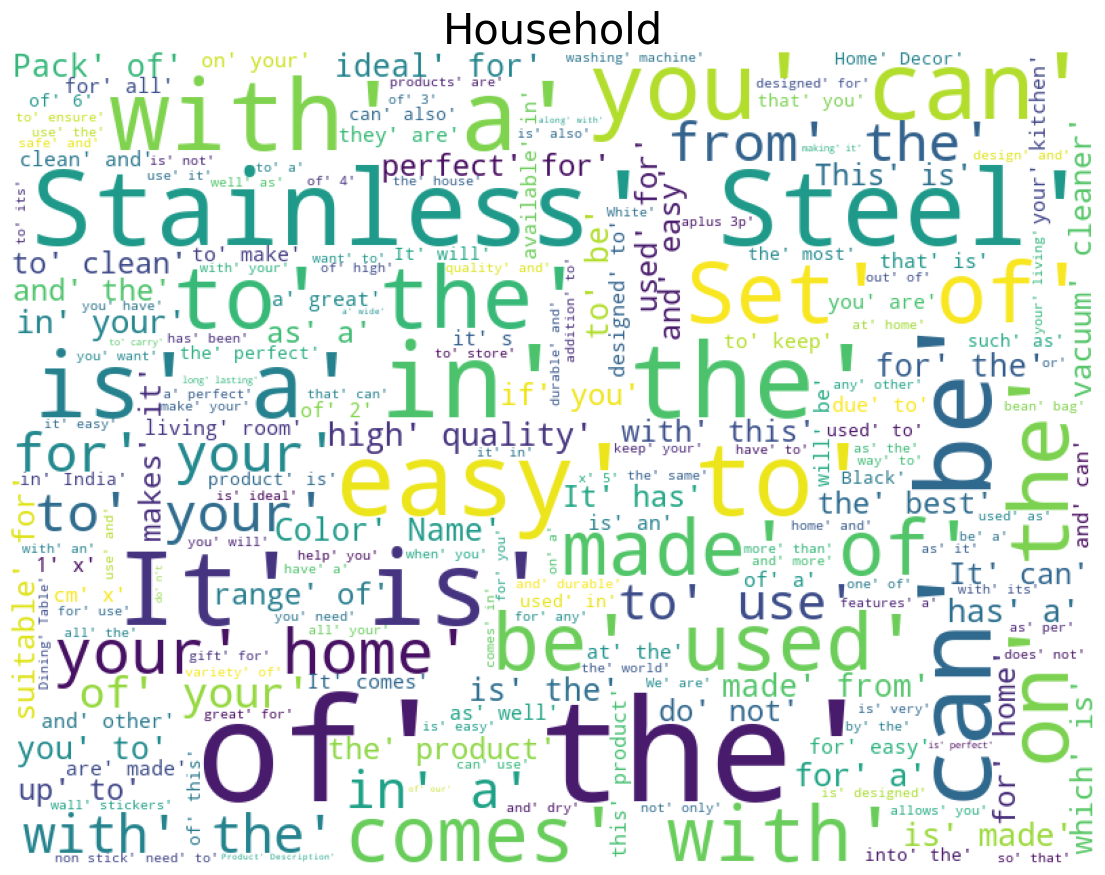

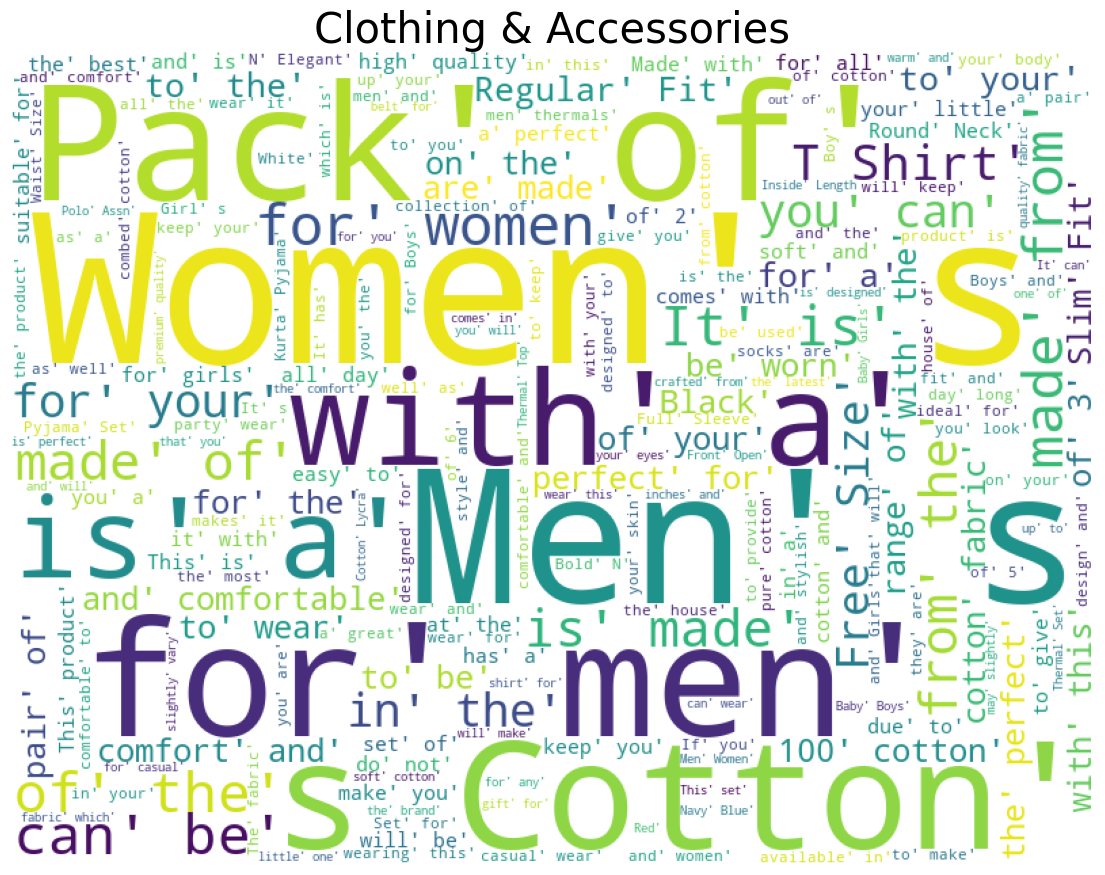

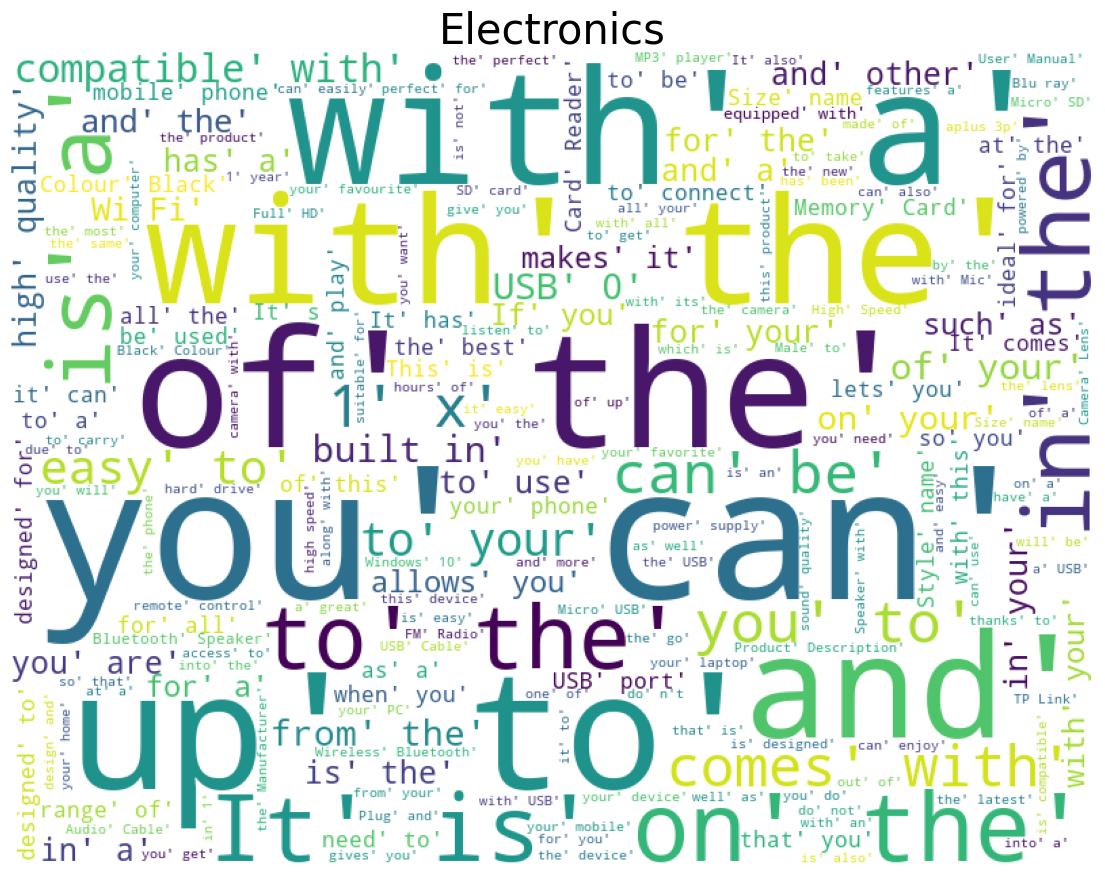

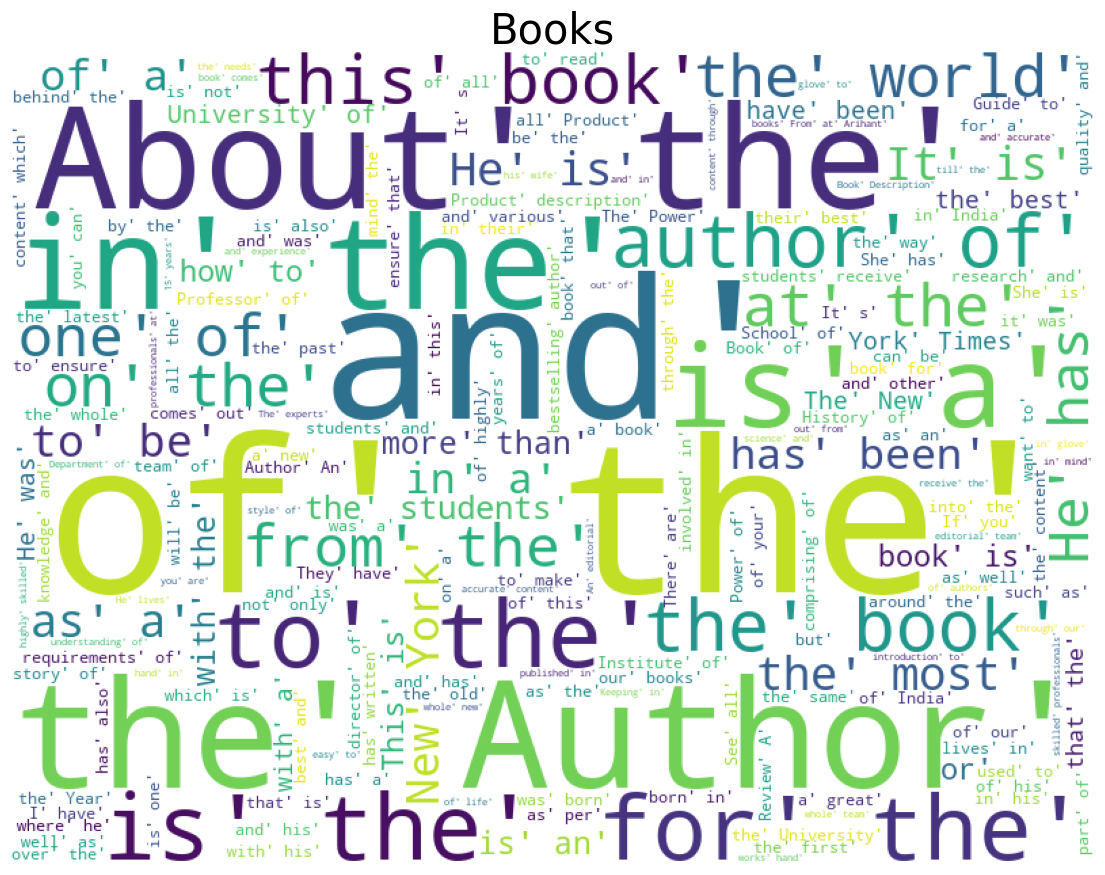

In [13]:
for category in labels:
  show_wordcloud(data[data['Category']==category], category)

In [15]:
data=pd.read_csv('ecommerceDataset.csv')
data=data.dropna()


def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['Description'] = (data['Description'].apply(lambda x: strip_html(x))).copy(deep=True)

print(data.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22968\1041390206.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [16]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Description'] = (data['Description'].apply(lambda x: remove_numbers(x))).copy(deep=True)
print(data.head())

                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-BKN Deluxe Electric Can Opener, ...
2               Household  Anchor Penta  Amp  -Way Switch (White) - Pack ...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, % Po...
4               Household  Chef's Garage  Slot Edge Grip Kitchen Knife Sh...


In [17]:
def fix_words(text):
  text = re.sub("'", "", text)
  text = re.sub("`", "", text)
  return text

data['Description'] = (data['Description'].apply(lambda x: fix_words(x))).copy(deep=True)

In [18]:
print(data.head())

                 Category                                        Description
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-BKN Deluxe Electric Can Opener, ...
2               Household  Anchor Penta  Amp  -Way Switch (White) - Pack ...
3  Clothing & Accessories  Proline Mens Track Jacket Proline Woven, % Pol...
4               Household  Chefs Garage  Slot Edge Grip Kitchen Knife Sha...


In [19]:
data['Description'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1) 

In [20]:
from nltk.corpus import stopwords          
stopwords = stopwords.words('english')
nltk.download('omw-1.4') 
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return(words)

data['Description'] = data.apply(lambda row: normalize(row['Description']), axis=1)
data.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


Category                                        Description
0               Household  [styleys, work, iron, coat, rack, hanger, crea...
1               Household  [cuisinart, ccobkn, deluxe, electric, opener, ...
2               Household  [anchor, penta, amp, way, switch, white, pack,...
3  Clothing & Accessories  [proline, mens, track, jacket, proline, weave,...
4               Household  [chefs, garage, slot, edge, grip, kitchen, kni...

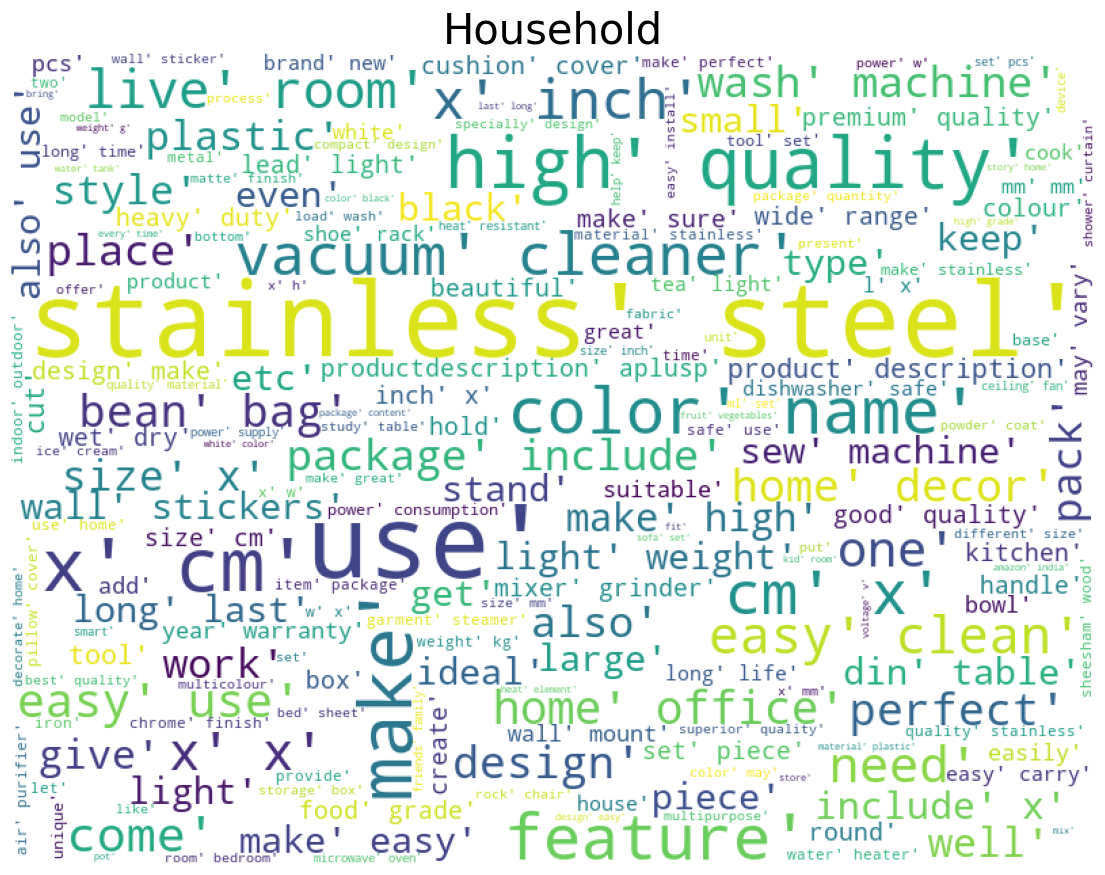

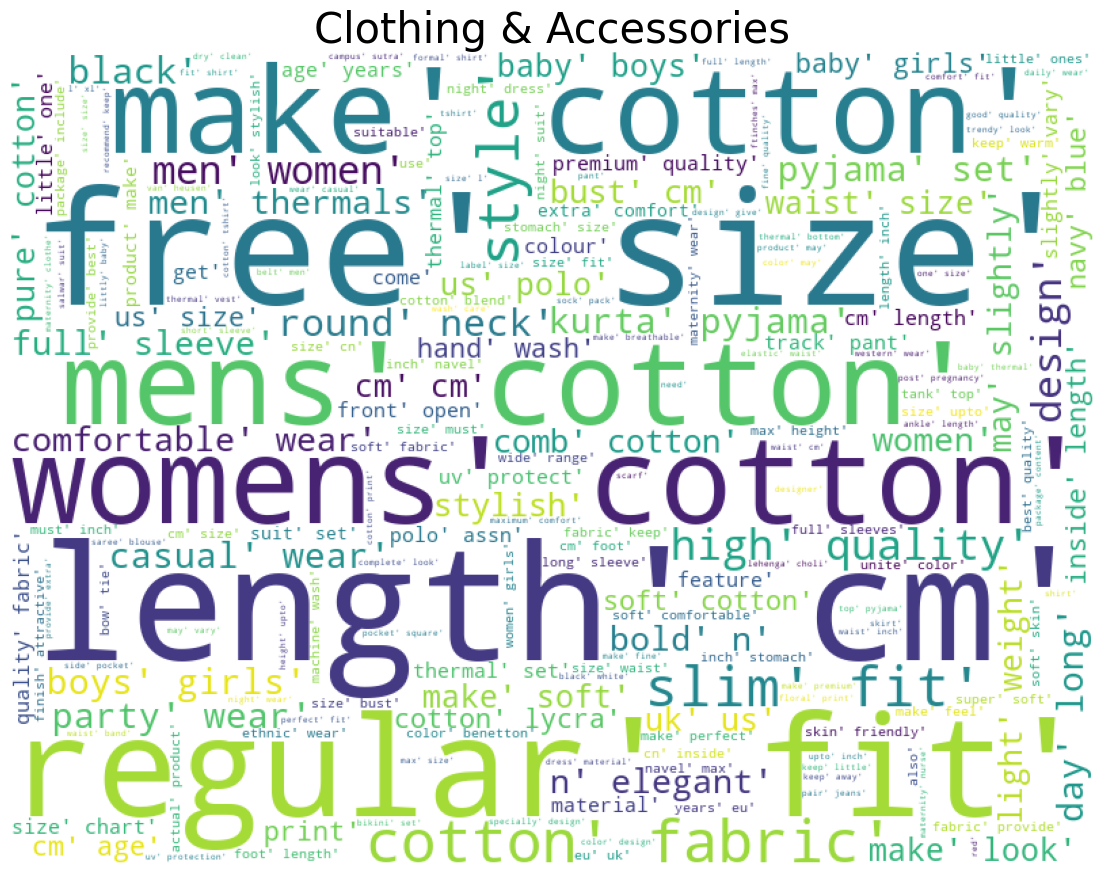

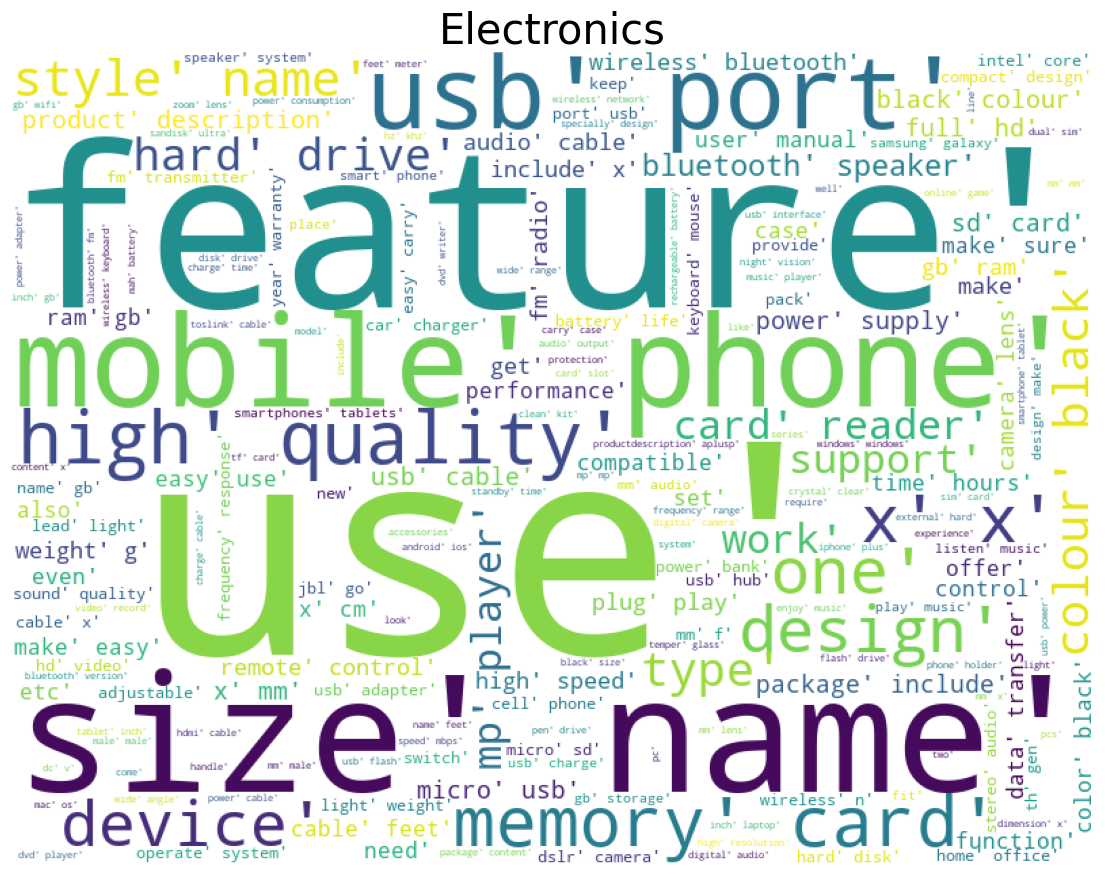

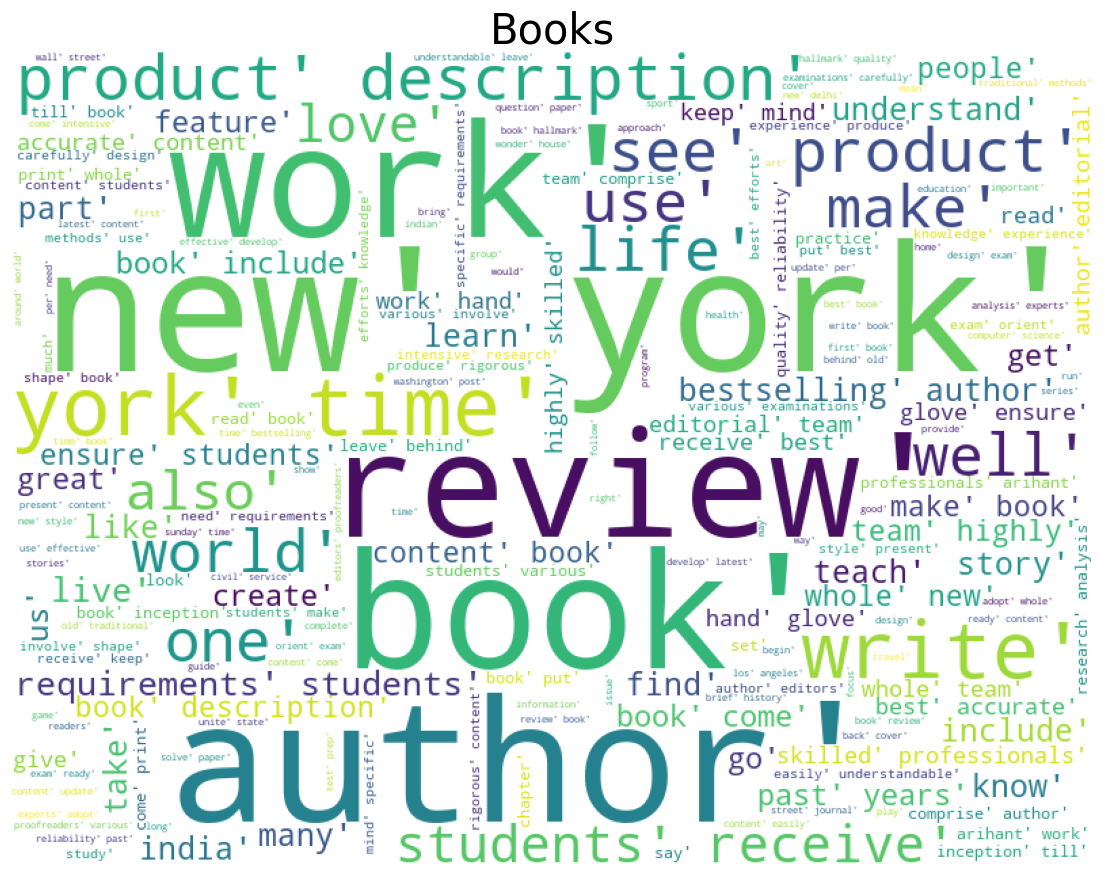

In [21]:
for category in labels:
  show_wordcloud(data[data['Category']==category], category)

In [22]:
def turn_into_strings(words):
    return ' '.join(words)

data['Description'] = data.apply(lambda row: turn_into_strings(row['Description']), axis=1)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(data['Description'])

data_features = data_features.toarray()  

In [24]:
data_features.shape

(50423, 2000)

In [25]:
all_labels = data['Category'].copy(deep=True)
all_labels = all_labels.tolist()
for i in range(len(all_labels)):
  if all_labels[i] == 'Household':
    all_labels[i] = 0
  if all_labels[i] == 'Clothing & Accessories':
    all_labels[i] = 1
  if all_labels[i] == 'Electronics':
    all_labels[i] = 2
  if all_labels[i] == 'Books':
    all_labels[i] = 3

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, all_labels, test_size=0.3, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier


RForestModel = RandomForestClassifier(n_estimators=10, n_jobs=4)

RForestModel.fit(X_train, y_train)



RandomForestClassifier(n_estimators=10, n_jobs=4)

In [29]:
prediction1=RForestModel.predict(X_test)

In [30]:
prediction1

array([3, 0, 0, ..., 1, 3, 0])

In [32]:
RForestModel.score(X_test,y_test)

0.96165796258346

In [33]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


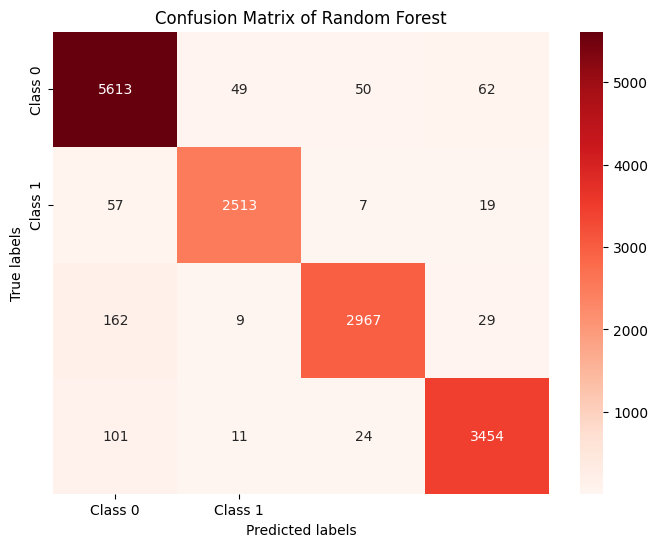

In [34]:
conf_matrix = confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [35]:
#USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
DTreeModel=DecisionTreeClassifier()
DTreeModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
prediction2=DTreeModel.predict(X_test)
prediction2

array([3, 0, 0, ..., 1, 3, 0])

In [38]:
DTreeModel.score(X_test,y_test)

0.9485687842929861

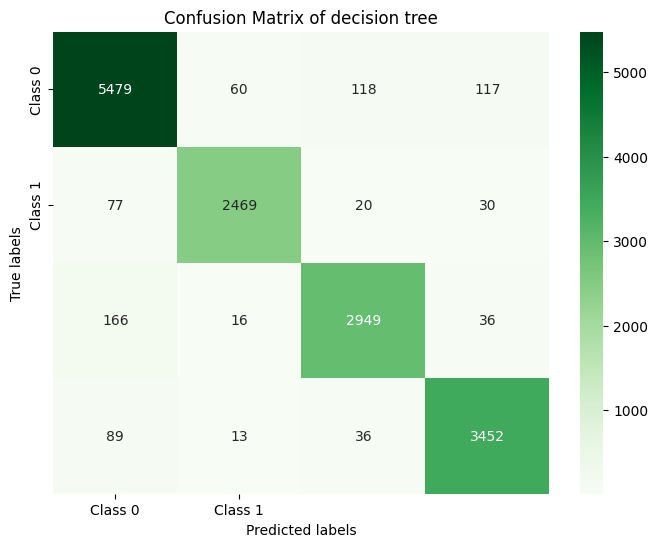

In [39]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of decision tree')
plt.show()

In [40]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
knnModel=KNeighborsClassifier()
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
prediction3=knnModel.predict(X_test)
prediction3

array([3, 0, 0, ..., 1, 3, 0])

In [44]:
knnModel.score(X_test,y_test)

0.8916506908177431

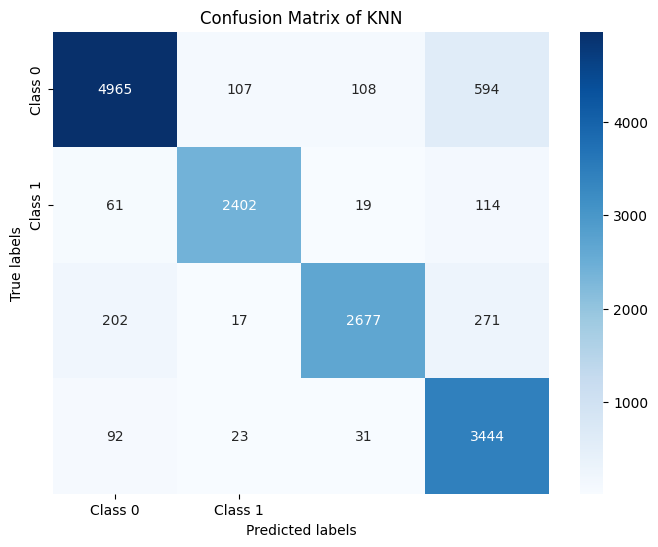

In [54]:
conf_matrix = confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of KNN')
plt.show()

In [47]:
from sklearn.svm import SVC


In [48]:
SVMmodel=SVC(kernel='linear')


In [49]:
SVMmodel.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
prediction4=SVMmodel.predict(X_test)
prediction4

array([3, 0, 0, ..., 1, 3, 0])

In [53]:
SVMmodel.score(X_test,y_test)

0.95703047530905

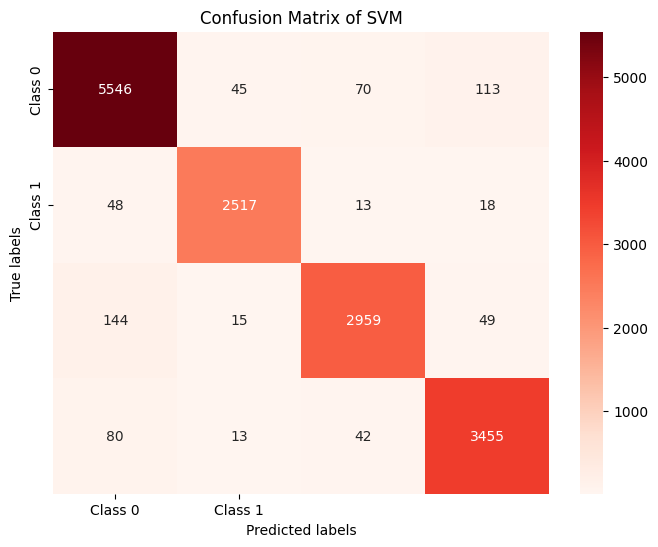

In [57]:
conf_matrix = confusion_matrix(y_test, prediction4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM')
plt.show()

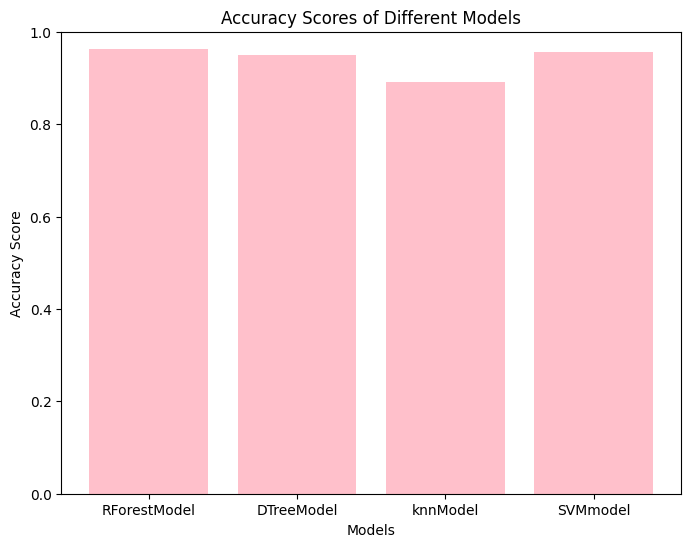

In [59]:
# comparing all model
model_names = ['RForestModel', 'DTreeModel', 'knnModel','SVMmodel']
scores = [RForestModel.score(X_test,y_test),DTreeModel.score(X_test,y_test),knnModel.score(X_test,y_test),SVMmodel.score(X_test,y_test)]  # Replace with actual scores

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, scores, color='pink')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy score
plt.show()
